# Using Auto Ml

## Classification Using Decision Tree

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("/Users/nanda/Downloads/Data Files/3. ST Academy - Decision Trees resource files/Movie_classification.csv",header=0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [5]:
df = df.fillna(df.Time_taken.mean())

In [6]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [7]:
df = pd.get_dummies(df,drop_first=True)

In [8]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [9]:
X = df.loc[:,df.columns != 'Start_Tech_Oscar']
y = df.Start_Tech_Oscar

In [10]:
X.shape

(506, 20)

## Splitting the data into traning and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [13]:
from pycaret.classification import *

In [14]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [16]:
cat_features = ['3D_available_YES','Genre_Comedy','Genre_Drama','Genre_Thriller','']


setup??

In [17]:
experiment = setup(df,target='Start_Tech_Oscar')

,Description,Value
0,Session id,3493
1,Target,Start_Tech_Oscar
2,Target type,Binary
3,Original data shape,"(506, 21)"
4,Transformed data shape,"(506, 21)"
5,Transformed train set shape,"(354, 21)"
6,Transformed test set shape,"(152, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [18]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6332,0.6768,0.7108,0.6497,0.6779,0.2540,0.2569,0.0460
lda,Linear Discriminant Analysis,0.6303,0.6926,0.6795,0.6626,0.6667,0.2502,0.2537,0.0110
ridge,Ridge Classifier,0.6277,0.0000,0.6479,0.6695,0.6545,0.2490,0.2521,0.0090
lightgbm,Light Gradient Boosting Machine,0.6190,0.6624,0.6797,0.6459,0.6604,0.2277,0.2296,0.0160
qda,Quadratic Discriminant Analysis,0.5906,0.6338,0.4932,0.6704,0.5654,0.1966,0.2057,0.0100
lr,Logistic Regression,0.5879,0.6442,0.6213,0.6281,0.6216,0.1677,0.1703,0.1430
et,Extra Trees Classifier,0.5875,0.6436,0.6747,0.6133,0.6385,0.1615,0.1658,0.0370
ada,Ada Boost Classifier,0.5844,0.6155,0.6063,0.6199,0.6096,0.1653,0.1669,0.0200
gbc,Gradient Boosting Classifier,0.5732,0.6079,0.6521,0.5990,0.6234,0.1312,0.1335,0.0370
nb,Naive Bayes,0.5708,0.6158,0.3063,0.7635,0.4305,0.1842,0.2333,0.0100


In [19]:
model = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6111,0.0000,0.6500,0.6500,0.6500,0.2125,0.2125
1,0.5833,0.0000,0.5500,0.6471,0.5946,0.1718,0.1742
2,0.5278,0.0000,0.7000,0.5600,0.6222,0.0129,0.0135
3,0.5833,0.0000,0.5789,0.6111,0.5946,0.1667,0.1669
4,0.7429,0.0000,0.7368,0.7778,0.7568,0.4845,0.4852
5,0.6571,0.0000,0.7895,0.6522,0.7143,0.2953,0.3038
6,0.6286,0.0000,0.5789,0.6875,0.6286,0.2626,0.2664
7,0.7714,0.0000,0.7368,0.8235,0.7778,0.5440,0.5475
8,0.6286,0.0000,0.5263,0.7143,0.6061,0.2697,0.2810


In [20]:
print(model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=3493, solver='auto',
                tol=0.0001)


Tuning Hyperparameters

In [21]:
tuning_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6389,0.0000,0.6500,0.6842,0.6667,0.2733,0.2737
1,0.6111,0.0000,0.6500,0.6500,0.6500,0.2125,0.2125
2,0.6111,0.0000,0.7500,0.6250,0.6818,0.1923,0.1976
3,0.6111,0.0000,0.6316,0.6316,0.6316,0.2198,0.2198
4,0.6286,0.0000,0.6316,0.6667,0.6486,0.2553,0.2557
5,0.7143,0.0000,0.7895,0.7143,0.7500,0.4186,0.4215
6,0.6286,0.0000,0.5789,0.6875,0.6286,0.2626,0.2664
7,0.6571,0.0000,0.7895,0.6522,0.7143,0.2953,0.3038
8,0.6571,0.0000,0.6842,0.6842,0.6842,0.3092,0.3092


Fitting 10 folds for each of 10 candidates, totalling 100 fits


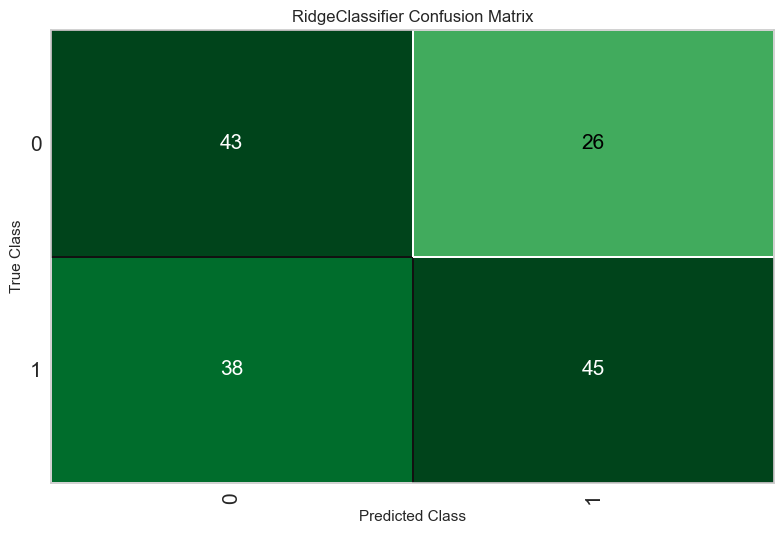

In [22]:
plot_model(tuning_model,plot='confusion_matrix')

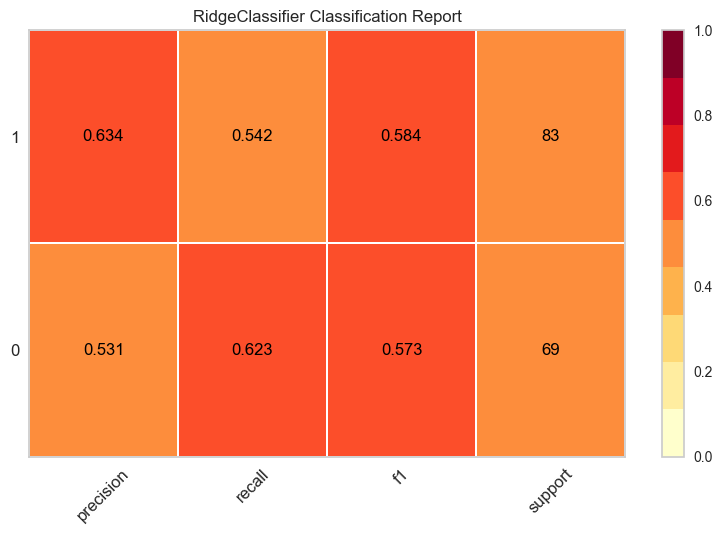

In [23]:
plot_model(tuning_model,plot='class_report')

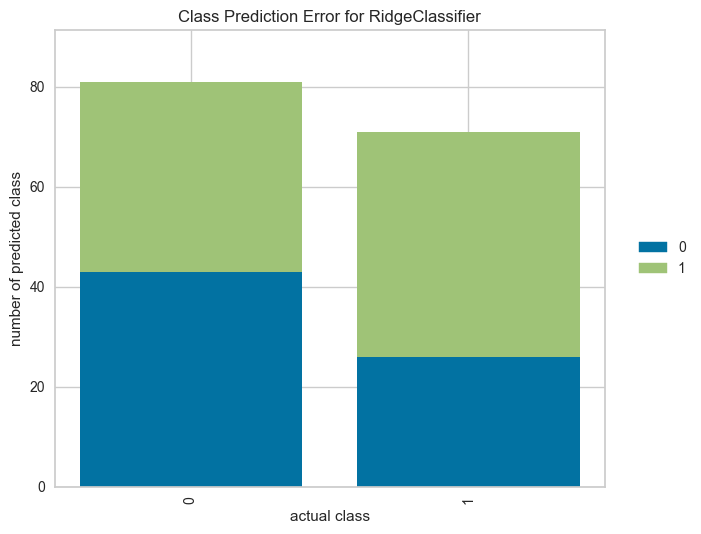

In [24]:
plot_model(tuning_model,plot='error')

In [25]:
evaluate_model(tuning_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
final_model = finalize_model(tuning_model)

In [27]:
print(final_model)

Pipeline(memory=FastMemory(location=/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Marketing expense',
                                             'Production expense',
                                             'Multiplex coverage', 'Budget',
                                             'Movie_length',
                                             'Lead_ Actor_Rating',
                                             'Lead_Actress_rating',
                                             'Director_rating',
                                             'Producer_rating', 'Critic_rating',
                                             'Trailer_vi...
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_n

In [28]:
test_pred = predict_model(final_model,data=df
                         )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6443,0.6424,0.6630,0.6778,0.6703,0.2842,0.2842


In [29]:
test_pred.head(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller,Start_Tech_Oscar,prediction_label
0,20.126400,59.619999,0.462,36524.125000,138.699997,7.825,8.095,7.910,7.995,7.94,...,223.839996,23,494,48000,1,0,0,1,1,0
1,20.546200,69.139999,0.531,35668.656250,152.399994,7.505,7.650,7.440,7.470,7.44,...,243.455994,42,462,43200,0,0,1,0,0,1
2,20.545799,69.139999,0.531,39912.675781,134.600006,7.485,7.570,7.495,7.515,7.44,...,2022.400024,38,458,69400,0,1,0,0,1,1
3,20.647400,59.360001,0.542,38873.890625,119.300003,6.895,7.035,6.920,7.020,8.26,...,225.343994,45,472,66800,1,0,1,0,1,1
4,21.381001,59.360001,0.542,39701.585938,127.699997,6.920,7.070,6.815,7.070,8.26,...,225.792007,55,395,72400,0,0,1,0,1,1
5,20.597000,59.360001,0.542,35718.648438,132.199997,6.890,7.100,6.885,7.005,7.26,...,284.592010,53,460,57400,1,1,0,0,0,1
6,21.765800,70.739998,0.476,33396.660156,140.100006,7.065,7.265,7.150,7.400,8.96,...,243.664001,41,522,45800,1,0,0,1,0,1
7,22.891001,70.739998,0.476,34285.460938,169.600006,6.980,7.075,6.875,7.170,7.96,...,243.535995,56,571,44200,0,0,1,0,0,1
8,24.224800,70.739998,0.476,31280.205078,173.500000,6.910,7.075,6.850,7.000,7.96,...,242.639999,55,564,33000,1,1,0,0,1,1
9,23.400801,70.739998,0.476,33352.218750,159.399994,6.665,6.725,6.575,6.855,7.96,...,283.023987,45,508,37800,1,0,0,1,1,1


## Using Pycaret and fine tuning the hyper params of Random Forest

In [30]:
model = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5556,0.5844,0.6000,0.6000,0.6000,0.1000,0.1000
1,0.5556,0.6422,0.6000,0.6000,0.6000,0.1000,0.1000
2,0.6389,0.7156,0.7500,0.6522,0.6977,0.2548,0.2586
3,0.6389,0.7585,0.7895,0.6250,0.6977,0.2642,0.2754
4,0.6857,0.7368,0.7895,0.6818,0.7317,0.3573,0.3629
5,0.7714,0.8553,0.7895,0.7895,0.7895,0.5395,0.5395
6,0.7429,0.7401,0.7895,0.7500,0.7692,0.4793,0.4801
7,0.7429,0.7615,0.8421,0.7273,0.7805,0.4741,0.4816
8,0.4571,0.4408,0.5263,0.5000,0.5128,-0.0992,-0.0993


In [31]:
print(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=3493, verbose=0, warm_start=False)


In [32]:
tuning = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5278,0.6187,0.5000,0.5882,0.5405,0.0613,0.0622
1,0.6389,0.6969,0.7500,0.6522,0.6977,0.2548,0.2586
2,0.6667,0.7500,0.8000,0.6667,0.7273,0.3077,0.3162
3,0.6389,0.7121,0.7895,0.6250,0.6977,0.2642,0.2754
4,0.7143,0.7434,0.8421,0.6957,0.7619,0.4128,0.4246
5,0.7143,0.8224,0.7368,0.7368,0.7368,0.4243,0.4243
6,0.6286,0.6546,0.6842,0.6500,0.6667,0.2479,0.2483
7,0.7429,0.7401,0.8421,0.7273,0.7805,0.4741,0.4816
8,0.4857,0.4671,0.6316,0.5217,0.5714,-0.0570,-0.0587


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


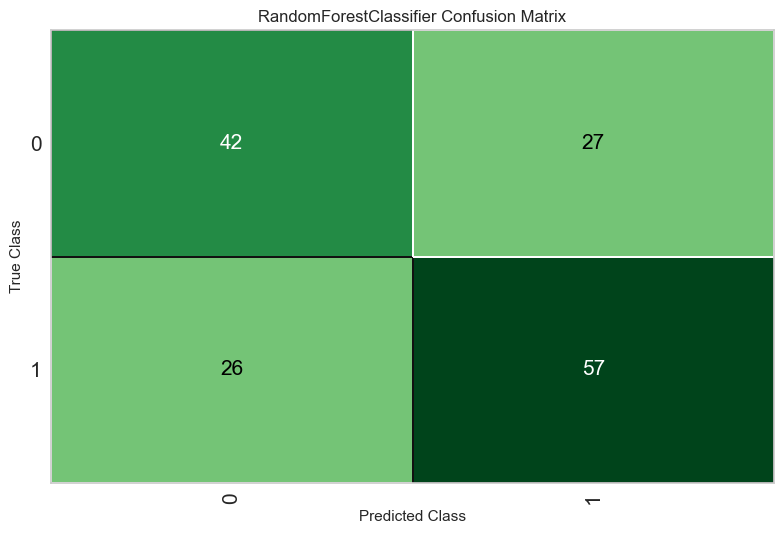

In [33]:
plot_model(tuning,'confusion_matrix')

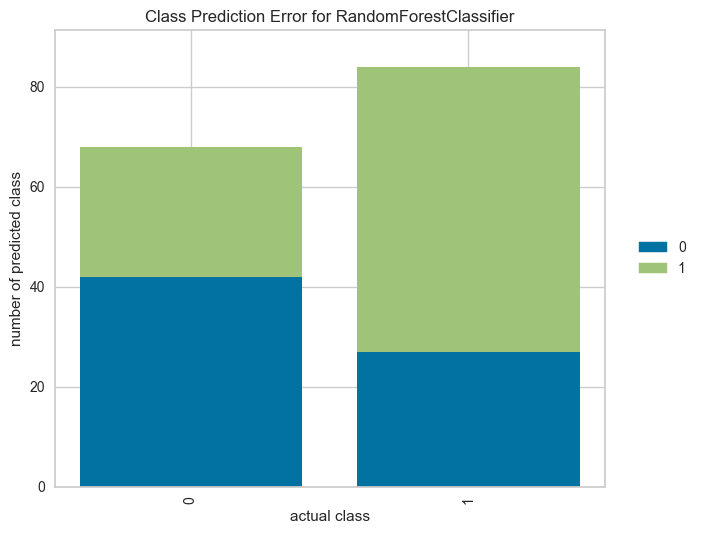

In [34]:
plot_model(tuning,'error')

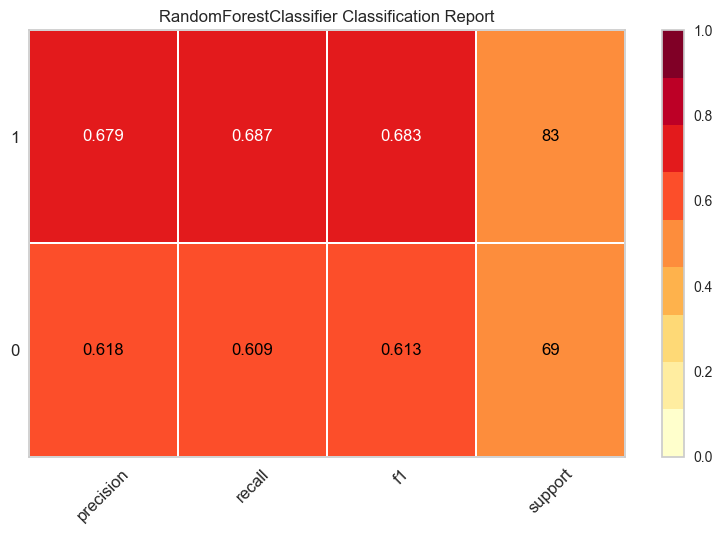

In [35]:
plot_model(tuning,'class_report')

In [46]:
evaluate_model(tuning)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
final = finalize_model(tuning)

In [38]:
print(final)

Pipeline(memory=FastMemory(location=/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Marketing expense',
                                             'Production expense',
                                             'Multiplex coverage', 'Budget',
                                             'Movie_length',
                                             'Lead_ Actor_Rating',
                                             'Lead_Actress_rating',
                                             'Director_rating',
                                             'Producer_rating', 'Critic_rating',
                                             'Trailer_vi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max

In [39]:
test_pred = predict_model(tuning,df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8953,0.9679,0.9058,0.9025,0.9042,0.7887,0.7887


In [40]:
test_pred.head(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller,Start_Tech_Oscar,prediction_label,prediction_score
0,20.126400,59.619999,0.462,36524.125000,138.699997,7.825,8.095,7.910,7.995,7.94,...,23,494,48000,1,0,0,1,1,0,0.65
1,20.546200,69.139999,0.531,35668.656250,152.399994,7.505,7.650,7.440,7.470,7.44,...,42,462,43200,0,0,1,0,0,0,0.89
2,20.545799,69.139999,0.531,39912.675781,134.600006,7.485,7.570,7.495,7.515,7.44,...,38,458,69400,0,1,0,0,1,1,0.86
3,20.647400,59.360001,0.542,38873.890625,119.300003,6.895,7.035,6.920,7.020,8.26,...,45,472,66800,1,0,1,0,1,1,0.81
4,21.381001,59.360001,0.542,39701.585938,127.699997,6.920,7.070,6.815,7.070,8.26,...,55,395,72400,0,0,1,0,1,1,0.90
5,20.597000,59.360001,0.542,35718.648438,132.199997,6.890,7.100,6.885,7.005,7.26,...,53,460,57400,1,1,0,0,0,0,0.87
6,21.765800,70.739998,0.476,33396.660156,140.100006,7.065,7.265,7.150,7.400,8.96,...,41,522,45800,1,0,0,1,0,0,0.83
7,22.891001,70.739998,0.476,34285.460938,169.600006,6.980,7.075,6.875,7.170,7.96,...,56,571,44200,0,0,1,0,0,0,0.79
8,24.224800,70.739998,0.476,31280.205078,173.500000,6.910,7.075,6.850,7.000,7.96,...,55,564,33000,1,1,0,0,1,1,0.83
9,23.400801,70.739998,0.476,33352.218750,159.399994,6.665,6.725,6.575,6.855,7.96,...,45,508,37800,1,0,0,1,1,1,0.82


## Testing For Support Vector Regression

In [41]:
import numpy as np 
import pandas as pd

In [42]:
df = pd.read_csv("/Users/nanda/Downloads/Data Files/4. ST Academy - SVM resource files/Movie_regression.csv",header=0)

In [43]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [44]:
from pycaret.regression import *

In [45]:
reg_exp = setup(df, target='Collection', train_size=0.8,preprocess=True)


,Description,Value
0,Session id,6653
1,Target,Collection
2,Target type,Regression
3,Original data shape,"(506, 18)"
4,Transformed data shape,"(506, 21)"
5,Transformed train set shape,"(404, 21)"
6,Transformed test set shape,"(102, 21)"
7,Ordinal features,1
8,Numeric features,15
9,Categorical features,2


In [48]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4663.4512,43640258.7425,6531.0353,0.8654,0.1592,0.1212,0.0350
et,Extra Trees Regressor,4870.1461,53911958.0346,7235.2971,0.8378,0.1639,0.1220,0.0330
rf,Random Forest Regressor,5012.6145,63189306.8246,7733.2975,0.8069,0.1748,0.1289,0.0270
lightgbm,Light Gradient Boosting Machine,5170.4683,65387051.5576,7897.2571,0.7988,0.1934,0.1342,0.0270
ada,AdaBoost Regressor,6003.6141,69126021.8686,8156.7079,0.7785,0.1996,0.1596,0.0330
dt,Decision Tree Regressor,6375.7927,109892612.1951,10062.2479,0.6606,0.2478,0.1692,0.0250
knn,K Neighbors Regressor,7533.1854,110437405.0732,10321.8343,0.6550,0.2399,0.1886,0.0280
en,Elastic Net,7687.2718,117693895.1731,10730.7572,0.6432,0.3133,0.2007,0.0240
ridge,Ridge Regression,7697.8130,116215042.3178,10680.1593,0.6420,0.2917,0.2003,0.0240
llar,Lasso Least Angle Regression,7755.8275,116781925.1863,10712.2181,0.6384,0.2954,0.2021,0.0240


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=6653, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
model = create_model('svm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11857.2900,281194316.3374,16768.8496,-0.0462,0.3604,0.2812
1,13512.1980,395809384.3334,19894.9588,-0.2213,0.3599,0.2413
2,14025.2597,434489036.3014,20844.4006,-0.0416,0.3949,0.2998
3,13793.2286,416658928.1329,20412.2250,-0.0120,0.4690,0.4003
4,15657.7580,456815241.3534,21373.2366,-0.0380,0.4334,0.3614
5,15137.6381,407812611.0077,20194.3708,-0.0950,0.3834,0.3032
6,10038.1459,176070122.4755,13269.1417,-0.0922,0.4287,0.3993
7,13582.6606,361964584.4581,19025.3669,-0.0882,0.3943,0.3103
8,12668.7087,261053554.8129,16157.1518,-0.0936,0.4624,0.4599


In [53]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11815.3420,279917153.8244,16730.7248,-0.0415,0.3593,0.2800
1,13478.8076,394100912.0296,19851.9750,-0.2160,0.3588,0.2406
2,13964.3949,432479218.6493,20796.1347,-0.0368,0.3935,0.2981
3,13746.8511,414757741.0645,20365.6019,-0.0074,0.4676,0.3983
4,15608.1576,454713440.0880,21324.0109,-0.0332,0.4320,0.3597
5,15087.2161,405720074.5342,20142.4942,-0.0894,0.3820,0.3019
6,9991.2021,174549581.7059,13211.7214,-0.0828,0.4274,0.3975
7,13532.3928,360139265.3842,18977.3356,-0.0827,0.3930,0.3089
8,12625.6193,259228089.8962,16100.5618,-0.0859,0.4611,0.4582


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [55]:
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
predictions = predict_model(tuned_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regression,12974.4667,341302746.3537,18474.3808,-0.0140,0.4066,0.3342


## Using Custom Parameters

In [66]:
param_grid = {
    'C': [0.1, 1, 10,100,500,1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}


In [67]:
tuned_model2 = tune_model(model,custom_grid=param_grid)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6516.2192,147376542.5180,12139.8741,0.4517,0.2339,0.1458
1,8178.2055,107830217.3859,10384.1330,0.6673,0.2149,0.1684
2,9072.7821,197508322.9727,14053.7654,0.5265,0.2997,0.1922
3,9470.3283,213162845.7930,14600.0975,0.4822,0.3897,0.2431
4,8560.5866,160312486.9602,12661.4567,0.6357,0.7607,0.2329
5,8205.2184,139679511.8375,11818.6087,0.6249,0.2802,0.1911
6,6567.8956,68946392.8392,8303.3965,0.5723,0.5515,0.2287
7,7613.7702,112938055.9164,10627.2318,0.6605,0.3044,0.1732
8,8030.4400,108996897.3961,10440.1579,0.5434,0.4125,0.2838


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [68]:
evaluate_model(tuned_model2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…